<a href="https://colab.research.google.com/github/rugarce/Proyecto1Ruben-back/blob/main/Pr%C3%A1ctica_4_2_Regresi%C3%B3n_y_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 4: Regresión Lineal, Regresión Logística y Redes Neuronales
*Máster en Ciencia de Datos y Aprendizaje Automático - Universidad de La Rioja*

Durante el desarrollo de esta práctica, resuelve los ejercicios en este cuaderno justo después de ser propuestos.

Se valorará positivamente la documentación en las respuestas y la explicación de las mismas.

No olvides guardar tus versiones intermedias en GitHub (menú "Archivo" >> "Guardar una copia en GitHub") y la definitiva antes de la fecha límite de entrega.

Bibliografía:

* https://github.com/jakevdp/PythonDataScienceHandbook

* https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/#more-5722

* https://realpython.com/logistic-regression-python/


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


## Regresión Lineal Simple

Comenzaremos con el algoritmo de regresión lineal más conocido, ajustar los datos a una línea recta.
Este ajuste es un modelo de la forma
$$
y = ax + b
$$
donde $ a $ se conoce como *pendiente*, y $ b $ se conoce como *intersección*.

Consideramos los siguientes datos, que están dispersos alrededor de una línea con una pendiente de 2 y una intersección de -5:

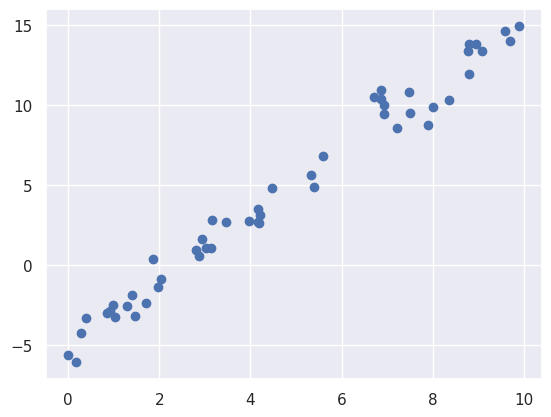

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Usamos el estimador de regresión lineal de Scikit-Learn *LinearRegression* para ajustar estos datos y construir la línea que mejor se ajuste a ellos.

0.9790800609430612


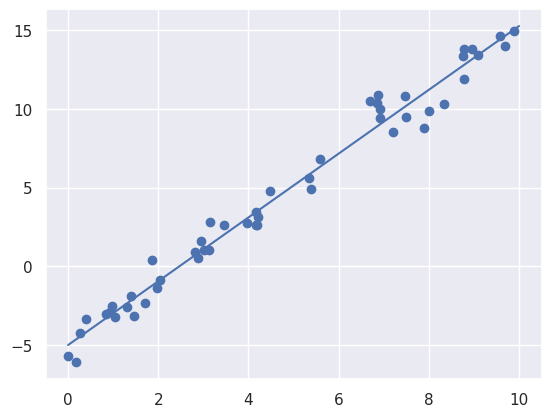

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
# fit espera un batch de datos, por eso en caso de tener una única dimensión hay que forzar una más
model.fit(x[:, np.newaxis], y) # np.newaxis se usa para aumentar la dimensión de la matriz existente en una dimensión más

xfit = np.linspace(0, 10, 1000) # np.linspace devuelve números espaciados uniformemente en un intervalo especificado.
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

print(model.score(x[:, np.newaxis], y)) #score calcula el coeficiente de determinación de la predicción.

La pendiente y la intersección de los datos están contenidos en los parámetros de ajuste del modelo. En Scikit-Learn siempre están marcados con un guión bajo al final. Aquí los parámetros relevantes son coef_ e intercept_:

In [4]:
print("Pendiente del modelo:    ", model.coef_[0])
print("Intersección:", model.intercept_)

Pendiente del modelo:     2.0272088103606953
Intersección: -4.998577085553204


Observa que los resultados están muy cerca de las entradas que hemos dado para crear el dataset, como se podría esperar.

Sin embargo, el modelo (o estimador) ``LinearRegression`` además de ajustes simples en línea recta, también puede manejar modelos lineales multidimensionales de la forma
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
donde hay varios valores $ x $.
Geométricamente, esto es similar a ajustar un plano a puntos en tres dimensiones, o ajustar un hiperplano a puntos en dimensiones más altas.

La naturaleza multidimensional de tales regresiones las hace más difíciles de visualizar, pero podemos ver uno de estos ajustes construyendo algunos datos de ejemplo, usando el operador de multiplicación de matrices de NumPy:

In [5]:
# creamos un conjunto de datos tridimensional
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

#creamos el modelo, recuerda que *model* ha sido definido antes como "model = LinearRegression(fit_intercept=True)"" y por tanto no hace falta volver a definirlo
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


Aquí, los datos de $y$ se construyen a partir de tres valores $x$ aleatorios, y la regresión lineal recupera los coeficientes utilizados para construir los datos.

Así comprobamos que podemos usar el modelo para ajustar líneas, planos o hiperplanos a nuestros datos.

## Funciones Base de Regresión

Hay ocasiones que se necesita adaptar la regresión lineal a relaciones no lineales entre variables y esto se puede conseguir transformando los datos usando *funciones base*.

La idea es tomar nuestro modelo lineal multidimensional:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
y construir $ x_1, x_2, x_3, $ y así sucesivamente, a partir de nuestra entrada unidimensional $ x $.
Es decir, sea $ x_n = f_n (x) $, donde $ f_n $ es alguna función que transforma nuestros datos.

Por ejemplo, si $ f_n (x) = x ^ n $, nuestro modelo se convierte en una regresión polinomial:
$$
y = a_0 + a_1 x + a_2 x ^ 2 + a_3 x ^ 3 + \cdots
$$
Observe que este es *todavía un modelo lineal*; la linealidad se refiere al hecho de que los coeficientes $ a_n $ nunca se multiplican ni se dividen entre sí.
Lo que hemos hecho es tomar nuestros valores unidimensionales $ x $ y proyectarlos en una dimensión superior, de modo que un ajuste lineal pueda encajar relaciones más complicadas entre $ x $ e $ y $.

### Función Base Polinomial

Esta proyección polinomial es muy útil y está integrada en Scikit-Learn, utilizando el transformador `` PolynomialFeatures '':

In [6]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])

poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

De esta manera vemos que el transformador ha convertido nuestra matriz unidimensional en una matriz tridimensional tomando el exponente de cada valor. Esta nueva representación de datos de mayor dimensión se puede conectar a una regresión lineal.

Para poder conectar distintas acciones vamos a usar ``pipeline``.
Veamos como sería crear un modelo polinomial de séptimo grado de esta manera.

In [7]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

De esta manera, cuando llamemos a *poly_model* primero transformará las características y luego aplicará el modelo ``LinearRegression``.

Veamos como ajustar unos datos que sumulan una onda sinusoidal con ruido.

0.9760274753833502


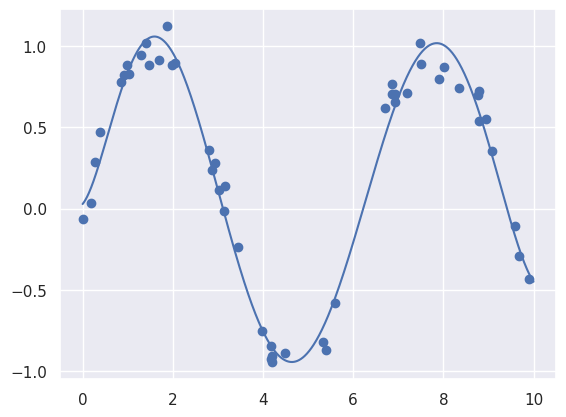

In [8]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
print(poly_model.score(x[:, np.newaxis], y)) #score calcula el coeficiente de determinación de la predicción.

**EJERCICIO**: con los datos de la onda sinusoidal, prueba a crear una línea recta como modelo de ajuste ¿qué error de predicción tiene? Utiliza el método ``score`` para obtener el valor de $R^2$ (coeficiente de determinación).

Compara el valor de $R^2$, para el modelo de ajuste con una recta, con un polinomio de grado 3, otro de 5 y con un polinomio de grado 9. Según estos valores, ¿qué modelo es mejor? Obten una gráfica similar a la anterior para cada caso.

**RESPUESTA**: El error de prediccion que tiene la linea recta tiene un error de 0.0033. Según los valores el mejor modelo es el de grado 9.

**EJERCICIO**:

*   ¿Crees que un polinomio de mayor grado mejorará la aproximación?
*   ¿Crees que puede conllevar algún problema en la generalización del modelo utilizar un grado mayor de 9? Si es que sí, indica cuál.

**RESPUESTA**: Si, creo que un polinomio de mayor grado mejorara la aproximación. En la generalización utilizar un modelo de grado mayor que 9 puede conllevar problemas ya que puede surgir overfitting



Recta: R2 = 0.0033
Polinomio Grado 3: R2 = 0.1697
Polinomio Grado 5: R2 = 0.9001
Polinomio Grado 9: R2 = 0.9858


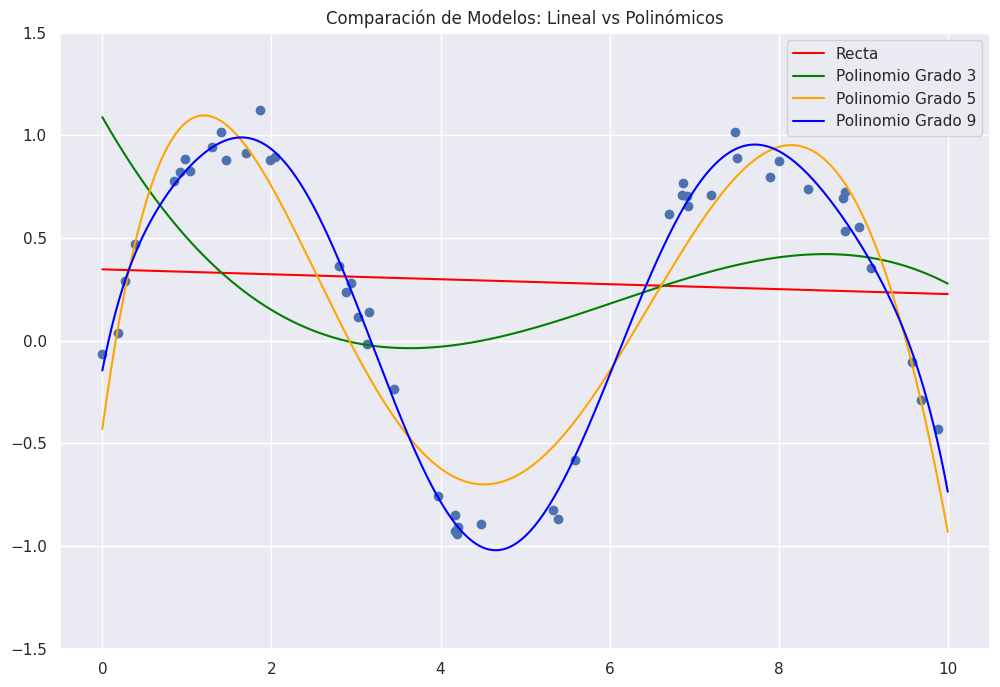

In [12]:
#Definir los grados a probar
grados = [1, 3, 5, 9]
colores = ['red', 'green', 'orange', 'blue']

plt.figure(figsize=(12, 8))
plt.scatter(x, y)

for i, grado in enumerate(grados):
  if grado == 1:
    # Grado 1 es una Regresión Lineal simple
    model = LinearRegression()
    nombre = "Recta"
  else:
    # Grados superiores requieren transformación polinómica
    model = make_pipeline(PolynomialFeatures(grado), LinearRegression())
    nombre = f"Polinomio Grado {grado}"

  # Entrenar
  model.fit(x[:, np.newaxis], y)
  # Predecir
  yfit = model.predict(xfit[:, np.newaxis])

  # Calcular R2
  score = model.score(x[:, np.newaxis], y)

  # Graficar y mostrar resultado en consola
  print(f"{nombre}: R2 = {score:.4f}")
  plt.plot(xfit, yfit, color=colores[i], label=nombre)

plt.legend()
plt.title("Comparación de Modelos: Lineal vs Polinómicos")
plt.ylim(-1.5, 1.5)
plt.show()


## Regularización

Las funciones base como la polinómica en regresión lineal hace que el modelo sea mucho más flexible, pero también puede conducir muy rápidamente a un ajuste excesivo.

Para poder controlar esto están los métodos de regularización que penalizan valores extremos en el modelo.

### Ridge regression ($L_2$ Regularization)

Quizás es la forma más común de regularización a veces también llamada *regularización de Tikhonov*.

Penaliza la suma de cuadrados de los coeficientes del modelo; en este caso, la penalización en el ajuste del modelo sería
$$
P = \alpha \sum_ {n = 1} ^ N \theta_n ^ 2
$$
donde $ \ alpha $ es un parámetro que controla la fuerza de la penalización.
Este tipo de modelo penalizado está integrado en Scikit-Learn con el estimador `` Ridge``:

0.974333106228888


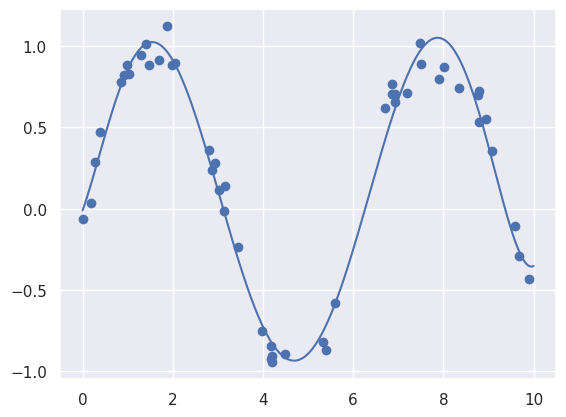

In [13]:
from sklearn.linear_model import Ridge

poly_model = make_pipeline(PolynomialFeatures(7), Ridge(alpha=0.1))

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

print(poly_model.score(x[:, np.newaxis], y))

El parámetro $ \alpha $ controla la complejidad del modelo resultante.
En el límite $ \alpha \to 0 $, recuperamos el resultado de regresión lineal estándar; en el límite de $ \alpha \to \infty $, se suprimirán todas las respuestas del modelo.

Una ventaja de la regresión *Ridge* en particular es que se puede calcular de manera muy eficiente, con un coste computacional apenas mayor que el modelo de regresión lineal original.

### Lasso regression ($L_1$ regularization)

Otro tipo de regularización muy común es el modelo *Lasso*, e implica penalizar la suma de valores absolutos de los coeficientes de regresión:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Aunque parece conceptualmente muy similar a la regresión de Ridge, los resultados pueden diferir sorprendentemente: por ejemplo, la regresión de Ridge, penaliza de forma proporcional al valor del coeficiente (más a los coeficientes más altos). Su efecto es homogeneizar dichos coeficientes. La regularización Lasso penaliza a todos los coeficientes de la misma forma. Por ello, tiende a eliminar los coeficientes pequeños llegando a eliminarlos del modelo.

0.6305670294751253


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.826e+00, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


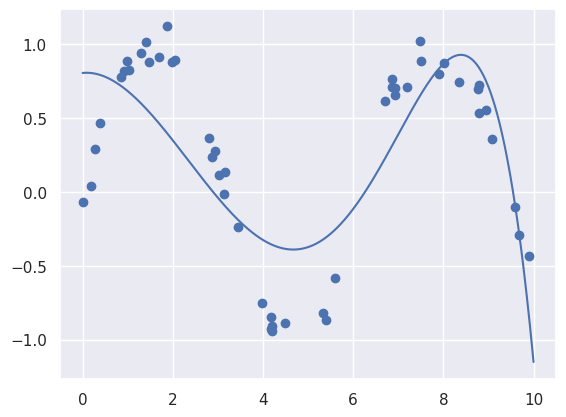

In [14]:
from sklearn.linear_model import Lasso

poly_model = make_pipeline(PolynomialFeatures(7), Lasso(alpha=0.001))

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

print(poly_model.score(x[:, np.newaxis], y))

**Nota:** El código anterior devuelve un *warning* sobre el número de iteraciones (por defecto son 1000) que no son suficientes para alcanzar la convergencia del modelo.

Esto indica que la solución obtenida puede que no sea la más óptima, y que hay que cambiar algún hiperparámetro para conseguir que el modelo llegue a converger. El estudio de hiperparámetros (sin que sea únicamente ensayo-error, se verá en la siguiente parte de la asignatura).

### Elastic Net

Otro tipo de regularización es el modelo denominado *Elastic Net*, penaliza con una combinación de l1 y l2 (es una mezcla de los dos modelos anteriores) $\alpha$ debe ser un valor entre [0,1].


0.5844223195984622


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.334e+00, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


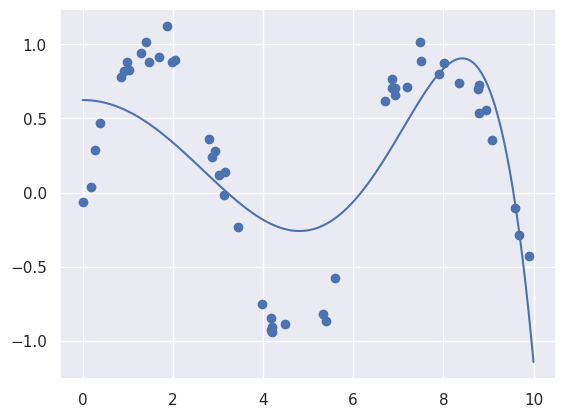

In [15]:
from sklearn.linear_model import ElasticNet

poly_model = make_pipeline(PolynomialFeatures(7), ElasticNet())

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

print(poly_model.score(x[:, np.newaxis], y))

**EJERCICIO**: Tenemos el siguiente conjunto de datos creado de manera aleatoria, con 10 instancias y 5 características.

In [17]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

algoritmos = [Ridge(), Lasso(), ElasticNet()]

for algoritmo in algoritmos:
  # Creamos el pipeline
  poly_model = make_pipeline(PolynomialFeatures(7), algoritmo)
  #Entrenamos
  poly_model.fit(X, y)
  #Predecimos
  yfit = poly_model.predict(X)
  #Obtenemos la puntuacion
  print(poly_model.score(X, y))

0.999968618327189
0.5864945512867155
0.7552761620620548


In [20]:
#Para que Lasso y ElasticNet obtengan mejor resultado necesitamos relajar la penalización, es decir, bajar el parametro alpha
# ademas, también es necesario aumentar max_iter, ya que hay muchas variables.
poly_model = make_pipeline(PolynomialFeatures(7), Lasso(alpha=0.001, max_iter=100000))

poly_model.fit(X, y)
yfit = poly_model.predict(X)

print(poly_model.score(X, y))


poly_model = make_pipeline(PolynomialFeatures(7), ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=1000000))

poly_model.fit(X, y)
yfit = poly_model.predict(X)

print(poly_model.score(X, y))

0.9999920017156757
0.9999978330384776


1.   Comprueba con los valores por defecto qué algoritmo de regularización es mejor para este conjunto de datos (combinándola como en los ejemplos anteriores con PolynomialFeatures(7)).
2.   Modifica algún parámetro para que los modelos Lasso y ElasticNet obtengan mejores resultado.

NOTA: encontrarás la información sobre el uso y los parámetros de los distintos modelos [aquí](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).


## Ejemplo - Ejercicios


Basándonos en lo visto hasta ahora vamos a ponerlo en práctica en dos ejemplos.

### **EJERCICIO 1**

En este ejemplo vamos a usar el dataset California que hace referencia al precio de las casas de la ciudad de California (más info [aquí](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)).

In [21]:
from sklearn.datasets import fetch_california_housing
california_dataset = fetch_california_housing()

california = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


La variable objetivo es este conjunto de datos es el valor medio de las viviendas ocupadas.

In [22]:
california['MEDV'] = california_dataset.target

Creamos los conjuntos de datos X (conjunto de características) e Y (variable objetivo).

In [23]:
X = pd.DataFrame(np.c_[california['MedInc'], california['HouseAge'], california['AveRooms'],california['AveBedrms'],california['Population'],california['AveOccup'],california['Latitude'],california['Longitude']], columns = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'])
Y = california['MEDV']

**EJERCICIO**: completa el código para obtener un conjunto de entrenamiento y de test del 80-20% de datos respectivamente. Usa una semilla para la aleatoriedad de 5.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


**EJERCICIO**: Crea y entrena un modelo de Regresión Lineal (con los valores por defecto)

In [32]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

**EJERCICIO**: obtén las métricas de evaluación para problemas de regresión ($RMSE$ y $R^2$) tanto para el conjunto de training como para el conjunto de test.

NOTA: Recuerda que la métrica $RMSE$ es la raíz cuadrada de la métrica $MSE$. Para el cálculo te pueden ayudar los métodos que se encuentran [aquí](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). En concreto los métodos ``mean_squared_error`` y ``r2_score``.

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
#Primeros predecimos los datos de entrenamiento y luego los de test.

y_train_predict = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2_train = r2_score(Y_train, y_train_predict)

print(f"RMSE del conjunto de entrenamiento: {rmse_train}")
print(f"R2 del conjunto de entrenamiento: {r2_train}")

y_test_predict = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)

print(f"RMSE del conjunto de test: {rmse_test}")
print(f"R2 del conjunto de test: {r2_test}")

RMSE del conjunto de entrenamiento: 0.7221082724134185
R2 del conjunto de entrenamiento: 0.6047922421276448
RMSE del conjunto de test: 0.7323532330518061
R2 del conjunto de test: 0.6112579104029969


**PREGUNTA**: Viendo las métricas obtenidas tanto para el conjunto de train como el de test, ¿crees que este modelo sufre de overfitting?

**RESPUESTA**: No, no se produce overfitting.

**EJERCICIO**: prueba a crear y entrenar tres nuevos modelos, uno con cada algoritmo de regularización, y compara los resultados obtenidos.
Indica qué modelo y sus hiperparámetros (si has usado algún valor de hiperparámetro que no sea por defecto) es el mejor de los 4 (LinearRegression, Ridge, Lasso o ElasticNet) para este conjunto de datos.


**RESPUESTA**: Son todos los modelos muy parecidos, aunque el que mejores resultados da son el modelo ElasticNet con el hiperparametro alpha = 0.01

In [47]:
#Algoritmo de  regularización Ridge
model = Ridge(alpha=0.01)
model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)

print(f"RMSE del conjunto de test: {rmse_test}")
print(f"R2 del conjunto de test: {r2_test}")


RMSE del conjunto de test: 0.7323541376524306
R2 del conjunto de test: 0.6112569500561633


In [48]:
#Algoritmo de  regularización Lasso
model = Lasso(alpha=0.01)
model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)

print(f"RMSE del conjunto de test: {rmse_test}")
print(f"R2 del conjunto de test: {r2_test}")

RMSE del conjunto de test: 0.7332737180423733
R2 del conjunto de test: 0.6102800868086449


In [49]:
#Algoritmo de  regularización ElasticNet
model = ElasticNet(alpha=0.01)
model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)

print(f"RMSE del conjunto de test: {rmse_test}")
print(f"R2 del conjunto de test: {r2_test}")

RMSE del conjunto de test: 0.7322054612683099
R2 del conjunto de test: 0.6114147727305359


###EJERCICIO 2: EXTRA

Veamos otro **ejemplo** de uso de regresión lineal.
En este caso haremos un poco de preprocesamiento de los datos para eliminar aquellos que no sean relevantes o se consideren outliers. Aunque en esta asignatura no se ve este tipo de técnicas, recordar que el preprocesado de los datos va directamente ligado al resultado que se obtenga del modelo.

En este ejemplo usaremos un conjunto de datos que contiene diversas URLs a artículos sobre Machine Learning de algunos sitios. Como características de entrada tendremos:



*   Title: Título del Artículo
*   url: ruta al artículo
*   Word count: la cantidad de palabras del artículo
*   \# of Links: los enlaces externos que contiene
*   \# of comments: cantidad de comentarios
*   \# Images video: suma de imágenes (o vídeos)
*   Elapsed days: la cantidad de días transcurridos (al momento de crear el archivo)
*   \# Shares: nuestra columna de salida que será la “cantidad de veces que se compartió el artículo”


A partir de las características de un artículo de machine learning (de una instancia) intentaremos predecir, cuántas veces será compartido en Redes Sociales.

In [50]:
# cargamos los datos
data = pd.read_csv('https://raw.githubusercontent.com/gadeamm/DataBases/main/articulos_ml.csv')

In [51]:
#veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

In [52]:
#son 161 registros con 8 columnas. Veamos los primeros registros
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Se ven algunos campos con valores NaN (nulos) por ejemplo algunas urls o en comentarios. Como ya hemos comentado, el objetivo de esta asignatura no es el preprocesado de los datos pero va muy ligado al resultado final así que vamos a ver como procederíamos con estos datos.

Veamos algunas estadísticas básicas de nuestros datos de entrada:

In [53]:
# estadísticas de nuestros datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Aquí vemos que la media de palabras en los artículos es de 1808. El artículo más corto tiene 250 palabras y el más extenso 8401.

Intentaremos ver con el modelo de regresión lineal, si hay una correlación entre la cantidad de palabras del texto y la cantidad de Shares obtenidos. Vamos a trabajar sólo con estas dos características y así evitamos el preprocesamiento del resto de datos. Pero hay que ser conscientes de que haciendo esto igual estamos quitando características relevantes para nuestro problema.

Hacemos una visualización general de los datos de entrada para estas dos características en particular.

<Axes: >

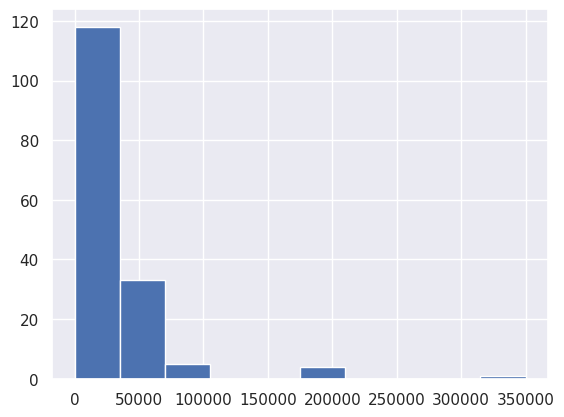

In [54]:
data['# Shares'].hist()

<Axes: >

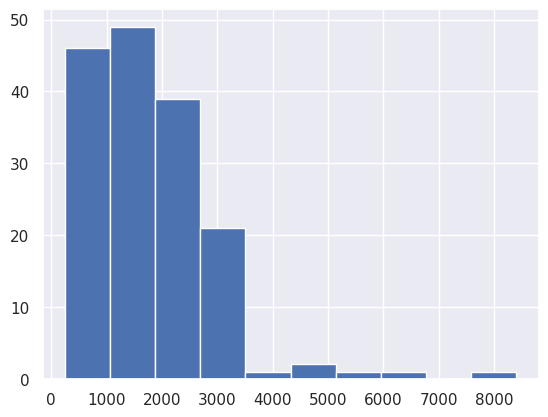

In [55]:
data['Word count'].hist()

Se observa que la mayoría de los datos están concentrados en la izquierda de la gráfica. Vamos a considerar como *outliers* o valores extremos los valores que están más hacia la derecha del histograma y vamos a filtrar los datos.

Para la *#cantidad de palabras* nos quedamos con los registros con menos de 3500 palabras y para la característica de *#Shares* con las instancias que sean menos a 80.000.

Lo gratificaremos pintando en azul los puntos con menos de 1808 palabras (la media) y en naranja los que tengan más.

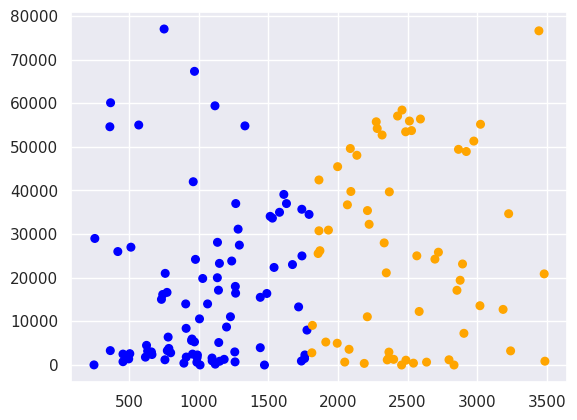

In [56]:
# Vamos a dibujar los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores=['orange','blue']
tamanios=[30,60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

Vamos a crear nuestros datos de entrada con estas dos características

In [58]:
# Asignamos nuestra variable de entrada X y las etiquetas Y.
data =filtered_data[["Word count"]]
X = np.array(data)
y = filtered_data['# Shares'].values

**EJERCICIO EXTRA**: crea un objeto ``LienearRegression``, crea un modelo y obtén el valor de los coeficientes y el término independiente.
Evalua el modelo obteniendo el *training error* usando las métricas $RMSE$ y $R^2$. En esta ocasión y por simplificar y visualizar mejor qué está pasando, vamos a trabajar sobre todo el conjunto, sin partirlo.

Coeficiente (Pendiente): 5.697653657389773
Término Independiente (Intercept): 11200.30322307416
RMSE: 19310.32698687068
R2: 0.05519842281951404


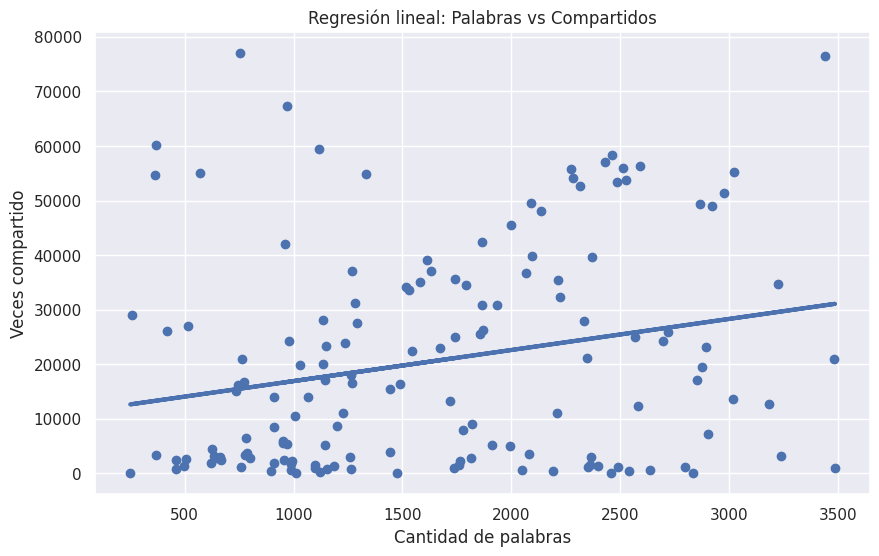

In [64]:
# Creamos y entrenamos el modelo
model = LinearRegression()
model.fit(X, y)

# Obtenemos los coeficientes e intersección
coeficiente = model.coef_[0]
termino_independiente = model.intercept_

print(f"Coeficiente (Pendiente): {coeficiente}")
print(f"Término Independiente (Intercept): {termino_independiente}")

# Prediccion
y_pred = model.predict(X)

# Calcular métricas RMSE y R2
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

#Visualizamos el resultado
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Datos Reales')
plt.plot(X, y_pred, linewidth=3, label='Línea de Regresión')
plt.xlabel('Cantidad de palabras')
plt.ylabel('Veces compartido')
plt.title('Regresión lineal: Palabras vs Compartidos')
plt.show()

**EJERCICIO EXTRA**:


1.   escribe la ecuación de la recta que hemos obtenido (recuerda: y=mx+b)

      y = 5.697653657389773x + 11200.30322307416

2.   ¿Cómo es el RMSE? (grande, medio, pequeño...) ¿qué indica este valor?

      Grande, indica que el error promedio del modelo es inmenso.

3.   ¿Cómo es el valor de $R^2$?

      Pequeño, el modelo apenas explica el 5% de la variabilidad de los datos.

4.   ¿Qué nos indican estas métricas sobre nuestro modelo?

      Indican que el modelo es malo y sufre de underfitting, ya que la variable "Word count" apenas explica la variabilidad de los datos.

5.   ¿Qué sugieres que se podría hacer para obtener un modelo mejor?

      Para obtener un modelo mejor podriamos hacer regresión lineal múltiple y añadir mas caracteristicas.



**EJERCICIO EXTRA**: Completa el código para representar la recta sobre el conjunto de datos

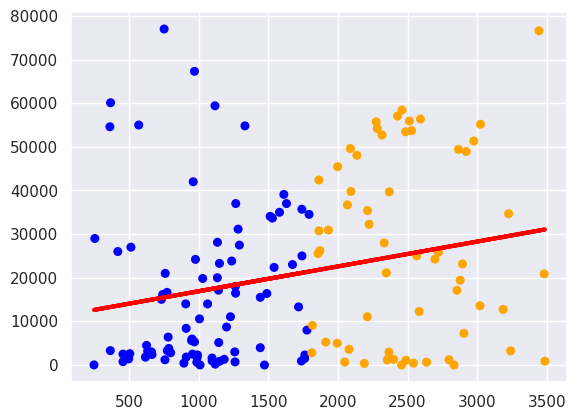

In [68]:
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.plot(f1, model.predict(X), color='red', linewidth=3)
plt.show()

Vamos a probar el modelo (aunque hemos visto que puede ser mejorable), suponemos que queremos predecir cuántas veces se va a compartir un artículo de 2100 palabras

In [70]:
# Queremos predecir cuántos "Shares" va a obtener un artículo con 2.100 palabras,
y_Dosmil = model.predict([[2100]])
print(int(y_Dosmil))

23165


/tmp/ipython-input-1765546172.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_Dosmil))


Para mejorar el modelo vamos a usar una regresión con múltiples variables, ahora la "ecuación de la recta" pasará a ser:
$y=b+m_1x_1+m_2x_2+...+m_nx_n$

En nuestro caso, utilizaremos 2 “variables predictivas”.

Nuestra primer variable seguirá siendo la cantidad de palabras y la segunda variable será la suma de 3 columnas de entrada: la cantidad de enlaces, comentarios y cantidad de imágenes.

In [71]:
#Vamos a intentar mejorar el Modelo, con una dimensión más:
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
X_train = np.array(dataX2)
y_train = filtered_data['# Shares'].values

**EJERCICIO EXTRA**: completa el código.

In [73]:
# Creamos un nuevo objeto de Regresión Lineal
model = LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
model.fit(X_train, y_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
y_pred = model.predict(X_train)

# Los coeficientes: esta vez obtendremos 2 coeficientes, para graficar un plano
coeficientes = model.coef_
termino_independiente = model.intercept_

print("Coeficientes:", coeficientes)
print("Término independiente:", termino_independiente)

# Obtenemo la raíz del error cuadrático medio (RMSE)
rmse_2d = np.sqrt(mean_squared_error(y_train, y_pred))
print("RMSE:", rmse_2d)

# Obtenemos la métrica R^2
r2_2d = r2_score(y_train, y_pred)
print("R2:", r2_2d)

Coeficientes: [   6.63216324 -483.40753769]
Término independiente: 16921.891098343356
RMSE: 18764.935824008302
R2: 0.107813760282097


**EJERCICIO EXTRA**: ¿mejoran las métricas con respecto al anterior modelo? ¿qué conclusión puedes extraer para este problema en concreto?

Sí, las métricas mejoran ligeramente (el $R^2$ sube al 10%), pero el modelo sigue siendo pobre y malo para predicciones reales dado el alto valor del RMSE.

La conclusión es que la viralidad no tiene una relación lineal fuerte con la longitud del texto ni con la cantidad de elementos multimedia.

##Logistic Regression

La Regresión Logística Simple, desarrollada por David Cox en 1958, es un método de regresión que permite estimar la probabilidad de una variable cualitativa binaria en función de una variable cuantitativa. Una de las principales aplicaciones de la regresión logística es la de clasificación binaria, en el que las observaciones se clasifican en un grupo u otro dependiendo del valor que tome la variable empleada como predictor.

Es importante tener en cuenta que, aunque la regresión logística permite clasificar, se trata de un modelo de regresión que modela el logaritmo de la probabilidad de pertenecer a cada grupo. La asignación final se hace en función de las probabilidades predichas.

El conjunto de datos que vamos a usar para ver cómo usar la regresión logística trata sobre el reconocimiento de imágenes. En concreto el reconocimiento de dígitos escritos a mano.

Este conjunto de datos tiene 1797 observaciones (o instancias), cada una de las cuales es una imagen de un dígito escrito a mano. Cada imagen tiene 64 px, con un ancho de 8 px y una altura de 8 px.

Las entradas son vectores con 64 dimensiones o valores. Cada vector de entrada describe una imagen. Cada uno de los 64 valores representa un píxel de la imagen. Los valores de entrada son los números enteros entre 0 y 16, según el tono de gris del píxel correspondiente. La salida de cada observación es un número entero entre 0 y 9, consistente con el dígito de la imagen. Hay diez clases en total, cada una correspondiente a una imagen.

In [75]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

Obtenemos el dataset directamente de scikit-learn con load_digits(). Esto devuelve una tupla de las entradas y la salida:



In [76]:
x, y = load_digits(return_X_y=True)

Así tenemos que x es una matriz multidimensional con 1797 filas y 64 columnas. Contiene enteros de 0 a 16. y es una matriz unidimensional con 1797 enteros entre 0 y 9.

In [77]:
x.shape

(1797, 64)

Separamos el conjunto de datos, usando el 80% para entrenar y el 20% para testear

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Usando ``StandardScaler`` transformamos los datos de tal manera que la media de cada columna sea igual a cero y la desviación estándar de cada columna sea uno. De esta forma, obtiene la misma escala para todas las columnas.

Es una buena práctica estandarizar los datos de entrada que usa para la regresión logística, aunque en algunos casos no es necesario. La estandarización puede mejorar el rendimiento del algoritmo.

Es útil si se necesita comparar e interpretar los pesos y es importante cuando se aplica la penalización porque el algoritmo en realidad está penalizando los valores grandes de los pesos.

In [80]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

Cuando se trabaje con problemas multiclase, hay que especificar el parámetro *multi_class* de ``LogisticRegression`` para decir cómo solucionar el problema:

*   'ovr' se trata como un problema binaria y se ajusta a cada clase.
*   'multinomial' se aplica el ajuste de pérdida multinomial.

Para tener más información de los parámetros de ``LogisticRegression``, como el algoritmo a usar para la optimización del problema (*solver*) puedes mirar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [81]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

Vamos a usar el conjunto de test para evaluar el modelo obtenido.

Como hemos escalado los datos de entrenamiento, también debemos escalar los datos de test usando la misma escala usada en el modelo y para ello usamos la misma instancia de ``StandardScaler``.

In [82]:
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)

Obtenemos el error para los datos de entrenamiento  (*training error*) y para los datos de test (*testing error*). Recuerda que la precisión del conjunto de test es más relevante a la hora de evaluar el rendimiento en datos invisibles, ya que no está sesgada.

In [83]:
# training error
print(model.score(x_train, y_train))
# testing error
print(model.score(x_test, y_test))

0.964509394572025
0.9416666666666667


Además de las clases para cada instancia, podemos obtener la probabilidad de pertenecer a cada una de las clases del problema para cada instancia con el método ``predict_proba``.

De esta manera podremos saber, si una instancia ha sido clasificada en una determianda clase por ser la que más probabilidad tiene, teniendo esta una gran diferencia con el resto de clases (como por ejemplo en este problema, si una instancia es clasificada como 0 con este vector de probabilidad [0.9, 0, 0, 0, 0, 0, 0.05, 0, 0.25, 0.25]) o por muy poca diferencia siendo el resultado *menos claro* (teniendo por ejemplo este vector de probabilidades [0.18, 0.11, 0.02, 0.09, 0.12, 0.1, 0.09, 0.07, 0.1, 0.12] dónde la clase con probabilidad más alta es la del 0 pero estando todos los valores de manera más justa).

In [85]:
#Obtenemos las probabilidades para la predicción de cada instancia
y_prob_pred=model.predict_proba(x_test)
#Vemos la predicción para la primera instancia, la clase que da el modelo
print("clase: ",y_pred[0])
#Obtenemos la probabilidad de pertenecer a cada una de las clases del modelo
print("vector de probabilidades: ",y_prob_pred[0])

clase:  2
vector de probabilidades:  [0.05485205 0.03141326 0.71170135 0.02815389 0.01215785 0.01843471
 0.00509584 0.09723406 0.02313256 0.01782445]


Observa como la probabilidad más alta es la que corresponde con la clase predicha, y observa el resto de probabilidades para hacer una idea de cómo de claro es ese resultado con respecto al resto al resto de clases.

Además, como estamos resolviendo un problema de clasificación, podemos calcular la matriz de confusión:

Y calcular todas las métricas de evaluación:

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



**EJERCICIO**: Al igual que en el último ejercicio de la práctica 3, vamos a rescatar el dataset sobre el vino de la práctica 2 y sobre los datos binarizados (clases "good" y "bad"). Aplica un modelo de regresión logística sobre estos datos y calcula su accuracy. Entrenamos el modelo con el mismo porcentaje de datos para el conjunto de testing y training que usasate en el ejercicio de la práctica 3 para poder comparar los resultados de ambos ejercicios.

¿Cuál dirías que es el mejor modelo para estos datos? ¿por qué?



In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

# Mostrar las 10 primeras filas del dataset
print(df.head(10))
# Comprobamos la dimensión del dataset
print(df.shape)
# Obtenemos el tipo de cada una de sus features
print(df.info())

In [ ]:
# Dividir las instancias del vino como 'good' y 'bad' a partir de la característica "quality"
bins = (2, 5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
# Asignamos una etiqueta a "quality"
label_quality = LabelEncoder()
# Bad tomará el valor 0 y good será el valor 1
df['quality'] = label_quality.fit_transform(df['quality'])
print(df['quality'].value_counts())

In [ ]:
#creamos una variable X que tendrá las características de nuestros datos menos la variable objetivo
X = df.drop('quality', axis=1)
#creamos una variable y que tendrá sólo la variable objetivo
y = df['quality']

In [ ]:
#Cambiar para usar el mismo de la práctica 3. Aquí aparece el conjunto de entrenamiento y testeo (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle = True) #se puede usar determinando el tamaño del conjunto de train "train_size"

In [ ]:

# Escala los conjuntos de train y test centrandolos en 0 y obteniendo una desviación estándar de 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

# Escala los conjuntos de train y test centrandolos en 0 y obteniendo una desviación estándar de 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Crea el modelo de regresión logística
# model = LogisticRegression(...)

## Neural Network



### Perceptron

Empezamos viendo un ejemplo de uso del algoritmo Perceptron, recuerda que es la estructura más simple de red neuronal.

En su versión más simple consta de dos capas con dos neuronas en la primera capa y una en la segunda, el cuál suele usarse para la clasificación de problemas en dos clases.

Además, el Perceptron proporciona la base para el desarrollo posterior de redes mucho más grandes.

Vamos a utilizar el método ``Perceptron`` que se encuentra dentro de la librería *Sklearn*.

Y el conjunto de datos es el de *flores Iris* que es muy común para el aprendizaje de uso de algoritmos de Aprendizaje Supervisado.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

# por simplificar, vamos a usar sólo dos características la longitud y el ancho de los pétalos
X = iris.data[:, (2, 3)]

``iris.target`` contiene las etiquetas 0, 1 y 2 correspondientes a los tres tipos de flores iris: setosa, virginica y versicolor respectivamente.

In [ ]:
print(iris.target)

Como hemos dicho antes, el algoritmo Perceptron se usa en clasificaciones binarias, luego lo primero que tenemos que hacer cuando tenemos más de una clase es convertir nuestro problema en otro de clasificación binaria, y para ello vamos a reclasificar las instancias como aquellas que pertenecen a la clase Iris Setosa y las que no (que serán las que pertenecen a las otras dos clases). Claramente obtendremos un conjunto desbalanceado, de momento vamos a trabajar así, aunque siendo conscientes de ello.

In [ ]:
y = (iris.target==0).astype(np.int8) # astype(np.int8) sirve para que en lugar de True/False aparezca 1/0
#comprobamos que sólo hay dos clases
print(y)

Una vez tenemos separado por un lado el conjunto de descriptores y por otro lado la variable objetivo, vamos a crear los conjuntos de entrenamiento y testeo con una relación del 80-20% respectivamente

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

Creamos ahora el modelo Perceptron y lo entrenamos con el conjunto de *training*.
Por defecto este método:

*   No requiere una tasa de aprendizaje.
*   No está regularizado (penalizado).
*   Actualiza su modelo solo en caso de errores.
*   El número de épocas (``max_iter``) está en 100.

Tienes toda la información sobre el modelo [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron).

Como este dataset está muy estudiado y preparado vamos a limitar el número de épocas a 10 ya que son suficientes, y vamos a poner en el parámetro ``tol`` un valor pequeño (0.001). Este parámetro indica la condición de parada.

In [ ]:
p = Perceptron(random_state=42,
              max_iter=10,
              tol=0.001)
p.fit(X_train, Y_train)

Ahora, usamos el conjunto de testeo para comprobar nuestro modelo, y calcular su *accuracy* usando el método ``score``.

In [ ]:
y_pred=p.predict(X_test)
print(p.score(X_test,Y_test))

En este caso tenemos un modelo con una *accuracy* de 1, lo que nos indica que nuestro modelo es perfecto para estos datos. Este dataset como ya hemos visto en otros ejemplos, está preparado y sus clases se pueden separar de una manera sencilla, esto provoca que tenga un resultado tan bueno.

Quédate con la idea de cómo trabaja el modelo y aplícalo en el ejercicio siguiente.

**EJERCICIO**: Vuelve sobre los datos del vino binarizados de la práctica 2. Con los mismos porcentajes de conjunto de test y train, aplica el modelo Perceptron sobre estos datos y calcula su *accuracy*.

Compara el resultado obtenido con todos los modelos de clasificación usados sobre este conjunto de datos.

¿Es este modelo mejor que los estudiados anteriormente?

###Multi-layer Perceptron

Veamos ahora el perceptrón multicapa (MLP) es un modelo de red neuronal artificial de retroalimentación que convierte conjuntos de datos de entrada en un conjunto de salidas apropiadas.

Un MLP consta de varias capas y cada capa está completamente conectada a la siguiente. Los nodos de las capas son neuronas que utilizan funciones de activación no lineales, excepto los nodos de la capa de entrada. Puede haber una o más capas ocultas no lineales entre la capa de entrada y la de salida.

Para ver un ejemplo de cómo funciona este algoritmo vamos a generar un ejemplo de dataset, dónde tenemos instancias con dos características y la clase objetivo se clasifica en dos etiquetas (0 y 1).

In [ ]:
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]

Cargamos la librería ``neural_network`` para poder usar ``MLPClassifier``. La información sobre los valores por defecto del método los encontrarás [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

Vamos a generar una red que tenga la siguiente estructura 2-5-2-1. Recuerda que la primera capa hace referencia al número de características que tiene el dataset y por tanto se refleja en el número de nodos. La segunda y tercera capa, serán nuestras capas ocultas y tendrán 5 y 2 nodos respectivamente y por último tendremos la capa de salida con un nodo que nos dará el resultado de la clasificación.

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000)

print(clf.fit(X, y))

El parámetro *solver* indica el método a seguir para obtener la optimización de los pesos, *alpha* es el parámetro de regularización, en *hidden_layer_sizes* hay que indicar el número de nodos que tienen las capas ocultas y *max_iter* es el número de épocas que se permiten como máximo para buscar la convergencia del método. Además de estos parámetros, mira [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) para ver qué otros hiperparámetros se pueden modificar, como por ejemplo la función de activación.

El atributo coefs_ contiene una lista de matrices con el peso para cada capa. La matriz de pesos en el índice i contiene los pesos entre la capa i y la capa i + 1.

In [ ]:
print("pesos entre la entrada y la primera capa oculta:")
print(clf.coefs_[0])
print("\npesos entre la primera capa oculta y la segunda:")
print(clf.coefs_[1])

In [ ]:
print("para acceder a los pesos de un determinado nodo podemos hacerlo así:")
clf.coefs_[0][:,0]

De hecho, podemos generalizarlo y mostrar los pesos de todos los nodos de la red de la siguiente manera:

In [ ]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

``intercepts_`` da la lista de los términos independientes (*bias*), dónde el vector de índice i representa el término sumado a la capa i+1.

In [ ]:
print("Términos de la primera capa oculta:")
print(clf.intercepts_[0])
print("\nTérminos de la segunda capa oculta:")
print(clf.intercepts_[1])

Vamos a usar el modelo obtenido para predecir un resultado para cuatro nuevas instancias.

In [ ]:
result = clf.predict([[0, 0], [0, 1],
                      [1, 0], [0, 1],
                      [1, 1], [2., 2.],
                      [1.3, 1.3], [2, 4.8]])
print(result)

En lugar de solo mirar los resultados de la clase, también podemos usar el método ``predict_proba`` para obtener las estimaciones de probabilidad.

In [ ]:
prob_results = clf.predict_proba([[0, 0], [0, 1],
                                  [1, 0], [0, 1],
                                  [1, 1], [2., 2.],
                                  [1.3, 1.3], [2, 4.8]])
print(prob_results)

Tened en cuenta que *prob_results[i][0]* da la probabilidad para la clase0, es decir para el valor "0" en este problema concreto y los *prob_results[i][1]* la probabilidad para la clase1, en este caso para el valor "1". El índice i corresponde con las instancias.

**EJERCICIO:**
Vuelve sobre los datos del vino binarizados de la práctica 2, y prueba a crear un modelo con la misma estructura que hemos visto en el ejemplo, cuyas capas ocultas sean 5-2. Continua con el mismo conjunto de entrenamiento y test para poder comparar las métricas entre este modelo y los anteriores.
¿es mejor que alguno de los modelos anteriores?


**EJERCICIO EXTRA**:
Crea una red con la estructura que quieras (que al menos tenga 3 capas), y prueba a entrenarla con dos funciones de activación distintas. Los modelos han de converger, así que si esto no ocurre prueba a cambiar el método de optimización de los pesos o el número de épocas. Describe con palabras cada uno de los modelos creados y calcula su accuracy.

**EJERCICIO**:
En la práctica 2, 3 y 4 se ha trabajado sobre los datos del vino binarizados en dos clases "*good*" y "*bad*". Recupera los datos sobre el modelo y sus métricas de cada uno de los ejercicios propuestos (en caso de haber realizado los EXTRA también).
Construye una tabla y compara los resultados obtenidos para cada modelo. Di cuál es con el que se ha obtenido mejor resultado y con qué hiperparámetros.